In [1]:
from model.layers import Conv2D, Flatten, FullyConnected, Pooling, Padding
from model.model import Model
from model.optimizers import Adam, SGD
from model.activations import ReLU, Softmax, Tanh
from model.losses import cross_entropy, mean_squared_error

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
import os

In [4]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Number of training examples: {x_train.shape[0]}")
print(f"Number of testing examples: {x_train.shape[0]}")
print(f"Size of each image: {x_train.shape[1:]}")

Number of training examples: 60000
Number of testing examples: 60000
Size of each image: (28, 28)


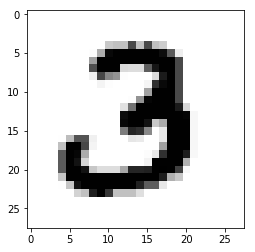

In [5]:
selected_image = x_train[242]

plt.imshow(selected_image, cmap="Greys")

In [6]:
def fix_y(arr):
    """
    Transforms the given array to a onehot encoded vector
    """
    new_arr = np.zeros((arr.shape[0], 10))
    for idx in range(arr.shape[0]):
        new_arr[idx][arr[idx]] = 1
    return new_arr

y_train = fix_y(y_train).astype("float32")
y_test = fix_y(y_test).astype("float32")

x_train = np.expand_dims(x_train, -1).astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.0

In [7]:
model = Model([
    Padding(2, mode="zero"),
    Pooling((2, 2), step=1, mode='max'),
    Conv2D((4, 4), step=2, filters=8),
    Tanh(),
    Padding(2, mode="zero"),
    Pooling((2, 2), step=1, mode='max'),
    Conv2D((4, 4), step=2, filters=16),
    Tanh(),
    Padding(1, mode="zero"),
    Pooling((2, 2), step=1, mode='max'),
    Conv2D((4, 4), step=2, filters=32),
    Tanh(),
    Flatten(),
    FullyConnected(10),
    Softmax()
])

In [8]:
optimizer = Adam(0.1)

In [9]:
# run the model on some data to create weights
model(x_train[:3])

optimizer.register_variables(model)

In [10]:
model.calculate_size()

13314

In [11]:
def split_data_to_batches(X, Y, batch_size):
    batches = X.shape[0] // batch_size
    for batch_idx in range(batches):
        start = batch_idx*batch_size
        end = (batch_idx+1)*batch_size
        yield X[start:end], Y[start:end]

In [12]:
weights_prefix = "training/"
if not os.path.exists(weights_prefix):
    os.mkdir(weights_prefix)

In [13]:
EPOCHS = 20
losses = []

for epoch in range(1, EPOCHS+1):
    epoch_loss = []
    for x,y in split_data_to_batches(x_train, y_train, 15000):
        preds = model(x)
        loss = cross_entropy(y, preds)
        model.backward(y, preds, optimizer) 
        epoch_loss.append(loss)
    print(f"Epoch {epoch} finished!\tLoss: {np.mean(epoch_loss):.5f}")
    losses.extend(epoch_loss)
    model.save(weights_prefix + "epoch" + str(epoch))

Epoch 1 finished!	Loss: 2.52089
Epoch 2 finished!	Loss: 2.18272
Epoch 3 finished!	Loss: 1.80984
Epoch 4 finished!	Loss: 1.31198
Epoch 5 finished!	Loss: 0.99371
Epoch 6 finished!	Loss: 0.83280
Epoch 7 finished!	Loss: 0.72186
Epoch 8 finished!	Loss: 0.64843
Epoch 9 finished!	Loss: 0.58641
Epoch 10 finished!	Loss: 0.52862
Epoch 11 finished!	Loss: 0.48230
Epoch 12 finished!	Loss: 0.44377
Epoch 13 finished!	Loss: 0.41148
Epoch 14 finished!	Loss: 0.38316
Epoch 15 finished!	Loss: 0.35971
Epoch 16 finished!	Loss: 0.34107
Epoch 17 finished!	Loss: 0.32445
Epoch 18 finished!	Loss: 0.30975
Epoch 19 finished!	Loss: 0.29654
Epoch 20 finished!	Loss: 0.28429


In [14]:
preds = model(x_test)
preds_am = np.argmax(preds, axis=1)
real = y_test
real_am = np.argmax(real, axis=1)

print(f"Test accuracy: {sum(preds_am == real_am)/x_test.shape[0] * 100:.2f}%")

Test accuracy: 92.22%


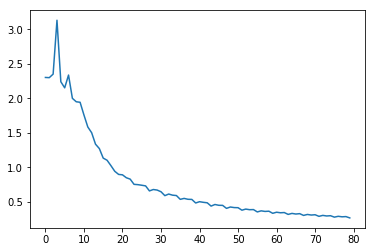

In [15]:
plt.plot(losses)
plt.show()